In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')
meta = pd.read_csv('lending_club_info.csv', index_col = 'LoanStatNew')

In [3]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


In [4]:
meta

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


# Assessing Data

### Completeness


### Validity

 - `Term` : months appended to the end of every term

### Accuracy
 - `Term` : Term is supposed to be an integer data type but currently a string

### Consistency

In [5]:
df.sample(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
353715,16400.0,36 months,7.62,511.05,A,A3,Kraft foods,7 years,MORTGAGE,47000.0,...,6.0,0.0,13271.0,61.7,8.0,f,INDIVIDUAL,1.0,0.0,"5150 Lee Stravenue Apt. 832\nDustinbury, OK 00813"
200166,16000.0,36 months,13.98,546.69,C,C3,foreman,10+ years,RENT,80000.0,...,9.0,0.0,3537.0,38.0,22.0,f,INDIVIDUAL,0.0,0.0,"017 Ryan Views\nEast Erika, MS 05113"
284577,10000.0,36 months,7.26,309.97,A,A4,supervisor,10+ years,OWN,90000.0,...,6.0,0.0,9508.0,63.4,31.0,f,INDIVIDUAL,2.0,0.0,"7118 Terry Junction Suite 689\nLake Pamela, AL..."


In [6]:
df.shape

(396030, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [9]:
df.pub_rec.value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
15.0         1
40.0         1
86.0         1
17.0         1
24.0         1
Name: pub_rec, dtype: int64

In [10]:
#Function to quickly get the meta data information for a particular column. Supply column name as argument
def descr(column):
    return print(meta.loc[column]['Description'])

In [11]:
descr('installment')

The monthly payment owed by the borrower if the loan originates.


In [12]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [13]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

<AxesSubplot:ylabel='Frequency'>

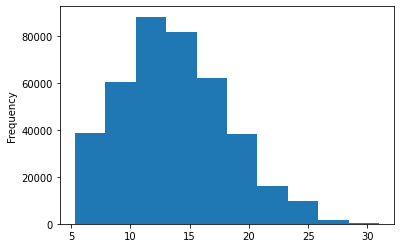

In [14]:
df['int_rate'].plot(kind='hist')

In [15]:
df['new_status'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off': 0})

In [16]:
df[['loan_status','new_status']].sample(10)

,loan_status,new_status
105557,Fully Paid,1
146203,Fully Paid,1
175046,Fully Paid,1
258187,Fully Paid,1
350560,Fully Paid,1
251085,Fully Paid,1
395976,Fully Paid,1
155642,Fully Paid,1
187170,Fully Paid,1
356237,Charged Off,0


In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
new_status                  0
dtype: int64

In [19]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
new_status                  0
dtype: int64

In [20]:
df.emp_title.nunique()

173105

In [21]:
df.emp_length.value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [22]:
df['employment_length'] = df['emp_length'].map({
                                                '10+ years':10, 
                                                '2 years': 2,
                                                '< 1 year': 1,
                                                '3 years':3,
                                                '5 years':5,
                                                '1 year':1,
                                                '4 years':4,
                                                '6 years':6,
                                                '7 years':7,
                                                '8 years':8,
                                                '9 years':9
                                                })

In [23]:
df.employment_length.isnull().sum()

18301

In [24]:
df.fillna({'employment_length':0}, inplace =True)

In [25]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
new_status                  0
employment_length           0
dtype: int64

In [26]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'new_status',
       'employment_length'],
      dtype='object')

In [27]:
df['title'].value_counts()

Debt consolidation               152472
Credit card refinancing           51487
Home improvement                  15264
Other                             12930
Debt Consolidation                11608
                                  ...  
Debt Consolitation                    1
Debt_Merger-2011                      1
High Credit Card Payoff               1
Cattle and Debt Consolidation         1
Business Vehicle Repair Loan          1
Name: title, Length: 48817, dtype: int64

In [28]:
df['title'].nunique()

48817

In [29]:
df.revol_util.dtype

dtype('float64')

In [30]:
descr('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [31]:
revol_util_mean = df.revol_util.mean()

In [32]:
df.fillna({'revol_util': revol_util_mean}, inplace = True)

In [33]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
new_status                  0
employment_length           0
dtype: int64

In [34]:
descr('mort_acc')

Number of mortgage accounts.


In [35]:
df[df['mort_acc'].isnull()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,new_status,employment_length
22,4200.0,36 months,6.99,129.67,A,A3,midstate steel llc,5 years,OWN,24000.0,...,0.0,0.0,7.0,f,INDIVIDUAL,NaN,0.0,"54395 Melissa Walks\nJenniferbury, AL 05113",1,5.0
25,6000.0,36 months,11.36,197.47,B,B5,CSU Monterey Bay,2 years,RENT,46680.0,...,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\nEast Preston, A...",0,2.0
32,3000.0,36 months,6.03,91.31,A,A1,American Heart Association,1 year,OWN,64000.0,...,4912.0,13.4,18.0,f,INDIVIDUAL,NaN,0.0,"2722 Smith Branch Suite 131\nShaunbury, NH 22690",1,1.0
41,28000.0,60 months,19.91,312.04,E,E4,American Airlines,10+ years,RENT,52000.0,...,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\nMatthewtown, CT 22690",0,10.0
62,5000.0,36 months,10.39,118.45,B,B4,self,10+ years,RENT,66000.0,...,15807.0,20.0,17.0,f,INDIVIDUAL,NaN,0.0,USS Goodman\nFPO AE 22690,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395991,5600.0,36 months,9.63,179.73,B,B1,Bank of New York Mellon,4 years,RENT,54000.0,...,2776.0,33.0,21.0,f,INDIVIDUAL,NaN,0.0,USNS Brewer\nFPO AA 29597,1,4.0
395995,10000.0,36 months,10.25,323.85,B,B2,The NPD Group,3 years,RENT,55000.0,...,5571.0,42.2,20.0,f,INDIVIDUAL,NaN,0.0,"PSC 0897, Box 0320\nAPO AP 22690",1,3.0
396016,3000.0,36 months,5.42,90.48,A,A1,Saint Paul Public Schools,10+ years,MORTGAGE,70000.0,...,4062.0,12.6,23.0,f,INDIVIDUAL,NaN,0.0,"2672 Jennifer River\nJoannemouth, AK 70466",1,10.0
396021,3200.0,36 months,5.42,96.52,A,A1,St Francis Medical Center,10+ years,RENT,33000.0,...,3985.0,7.6,50.0,f,INDIVIDUAL,NaN,0.0,"309 John Mission\nWest Marc, NY 00813",1,10.0


In [36]:
df.fillna({'mort_acc': 0, 'pub_rec_bankruptcies': 0}, inplace = True)

In [37]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
address                     0
new_status                  0
employment_length           0
dtype: int64

In [38]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
new_status                int64
employment_length       float64
dtype: object

In [39]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [40]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,new_status,employment_length
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,10.0
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,4.0
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,1.0
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,6.0
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,9.0


In [41]:
df['grade'] = df['grade'].astype('category')

In [42]:
df.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [43]:
df.verification_status.value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [44]:
df.application_type.value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [45]:
dummies = pd.get_dummies(df[['application_type','verification_status','home_ownership','grade']])

In [46]:
dummies.head()

,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [47]:
df = pd.concat([df,dummies], axis=1)

In [48]:
df.grade.value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [49]:
df.dtypes

loan_amnt                               float64
term                                      int64
int_rate                                float64
installment                             float64
grade                                  category
sub_grade                                object
emp_title                                object
emp_length                               object
home_ownership                           object
annual_inc                              float64
verification_status                      object
issue_d                                  object
loan_status                              object
purpose                                  object
title                                    object
dti                                     float64
earliest_cr_line                         object
open_acc                                float64
pub_rec                                 float64
revol_bal                               float64
revol_util                              

In [50]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'new_status',
       'employment_length', 'application_type_DIRECT_PAY',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G'],
      dtype='object')

In [51]:
df = df.drop(['grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
             'earliest_cr_line','initial_list_status', 'application_type','address'], axis=1)

In [52]:
df.dtypes

loan_amnt                              float64
term                                     int64
int_rate                               float64
installment                            float64
annual_inc                             float64
dti                                    float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
mort_acc                               float64
pub_rec_bankruptcies                   float64
new_status                               int64
employment_length                      float64
application_type_DIRECT_PAY              uint8
application_type_INDIVIDUAL              uint8
application_type_JOINT                   uint8
verification_status_Not Verified         uint8
verification_status_Source Verified      uint8
verification_status_Verified             uint8
home_ownershi

In [53]:
df.corr().new_status.sort_values()

int_rate                              -0.247758
term                                  -0.173246
grade_E                               -0.131385
grade_F                               -0.102158
grade_D                               -0.101877
revol_util                            -0.082341
home_ownership_RENT                   -0.063160
grade_G                               -0.062667
dti                                   -0.062413
loan_amnt                             -0.059836
verification_status_Verified          -0.050314
installment                           -0.041082
verification_status_Source Verified   -0.033030
open_acc                              -0.028012
grade_C                               -0.023871
pub_rec                               -0.019933
application_type_DIRECT_PAY           -0.010867
pub_rec_bankruptcies                  -0.009416
home_ownership_OWN                    -0.008726
home_ownership_NONE                   -0.000661
home_ownership_ANY                     0

In [54]:
X = df.drop('new_status', axis=1).values
y = df['new_status'].values

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistics Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=500)

In [62]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Prediction

In [63]:
predictions = logmodel.predict(X_test)

In [64]:
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [65]:
from sklearn.metrics import classification_report, accuracy_score

In [66]:
accuracy_score(y_test, predictions)

0.8045374550462927

In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.52      0.03      0.07     25613
           1       0.81      0.99      0.89    105077

    accuracy                           0.80    130690
   macro avg       0.66      0.51      0.48    130690
weighted avg       0.75      0.80      0.73    130690



In [126]:
new_data = df.drop('new_status', axis=1).iloc[566].values

In [127]:
df.shape

(396030, 34)

In [128]:
new_data = new_data.reshape(1,33)

In [71]:
logmodel.predict(new_data)

array([1], dtype=int64)

# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
randmodel = RandomForestClassifier()

In [74]:
randmodel.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
randpredictions = randmodel.predict(X_test)

In [76]:
accuracy_score(y_test, randpredictions)

0.8045910169102456

In [77]:
import pickle

filename = 'randomforestmodel_v1_aug_2022.sav'
pickle.dump(randmodel, open(filename, 'wb'))


# Neural Network - Tensorflow

In [85]:
import tensorflow as tf

In [86]:
from tensorflow.keras.models import Sequential

In [87]:
from tensorflow.keras.layers import Dense

In [90]:
model = Sequential()

In [91]:
X_train.shape

(265340, 33)

In [93]:
model.add(Dense(33, activation='relu'))
model.add(Dense(17, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [102]:
from tensorflow.keras.callbacks import EarlyStopping

In [108]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', patience = 5)

In [109]:
model.fit(x=X_train, y=y_train, epochs=150, batch_size=256, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/150
1037/1037 [==============================] - 2s 2ms/step - loss: 0.4445 - val_loss: 0.4500
Epoch 2/150
1037/1037 [==============================] - 2s 2ms/step - loss: 0.4442 - val_loss: 0.4503
Epoch 3/150
1037/1037 [==============================] - 3s 3ms/step - loss: 0.4444 - val_loss: 0.4496
Epoch 4/150
1037/1037 [==============================] - 2s 1ms/step - loss: 0.4442 - val_loss: 0.4496
Epoch 5/150
1037/1037 [==============================] - 1s 1ms/step - loss: 0.4443 - val_loss: 0.4492
Epoch 6/150
1037/1037 [==============================] - 1s 1ms/step - loss: 0.4444 - val_loss: 0.4491
Epoch 7/150
1037/1037 [==============================] - 1s 1ms/step - loss: 0.4442 - val_loss: 0.4504
Epoch 8/150
1037/1037 [==============================] - 2s 2ms/step - loss: 0.4441 - val_loss: 0.4495
Epoch 9/150
1037/1037 [==============================] - 3s 2ms/step - loss: 0.4443 - val_loss: 0.4494
Epoch 10/150
1037/1037 [==============================] - 4s 4ms/step - l

In [98]:
theloss = pd.DataFrame(model.history.history)

In [99]:
theloss.head()

,loss,val_loss
0,0.468561,0.458508
1,0.456296,0.456298
2,0.455477,0.456896
3,0.455023,0.455462
4,0.454433,0.455332


<AxesSubplot:>

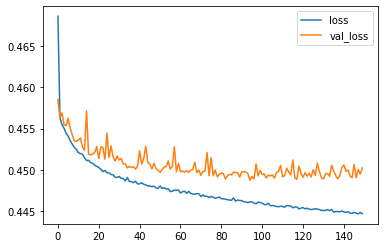

In [100]:
theloss.plot()

In [110]:
model.save('mymodel.h5')

In [112]:
from tensorflow.keras.models import load_model

In [113]:
themodelsent = load_model('mymodel.h5')

In [119]:
predictions = (themodelsent.predict(X_test)>0.5).astype("int32")

In [120]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [121]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      0.07      0.12     25613
           1       0.81      0.99      0.89    105077

    accuracy                           0.81    130690
   macro avg       0.68      0.53      0.51    130690
weighted avg       0.76      0.81      0.74    130690



In [122]:
print(accuracy_score(y_test, predictions))

0.8062896931670365


In [133]:
(themodelsent.predict(new_data)>0.5)

array([[ True]])